In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df=pd.read_csv("311-2015.csv",nrows=200000) #Importing the rows. 
df.head(5) #Seems to work.

c:\users\harsha devulapalli\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [3]:
def parse_date(str_date): #Using a function to convert the dates into datetime format.
    return dateutil.parser.parse(str_date)

df['created_datetime']=df['Created Date'].apply(parse_date) #Applying it here right away!

In [4]:
df.index = df['created_datetime'] #Making the index the date so that the magic below can happen.

In [5]:
df.head(5) #It worked! :D

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


In [6]:
df.columns #Loads of Columns, most of which won't be relevant anyways. 

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

What was the **most popular type of complaint**, and how many times was it filed?

In [7]:
df['Complaint Type'].value_counts().head(5) #Most popular complaints are Blocked Driveway, Illegal Parking and HOT WATER?! 

Blocked Driveway           21779
Illegal Parking            19837
HEAT/HOT WATER             12408
Noise - Street/Sidewalk    11949
Noise - Commercial          9603
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

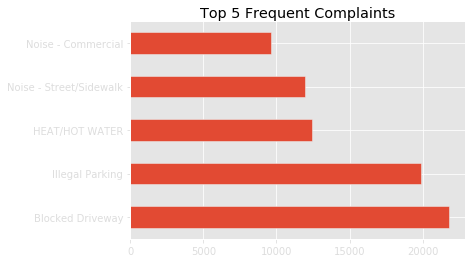

In [46]:
df['Complaint Type'].value_counts().head(5).plot(kind='barh',title='Top 5 Frequent Complaints') # A Horizontal Bar Graph of Complaints. 

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [9]:
df['Borough'].value_counts() #Counting Complaints in the Boroughs. Using Population Data, We can find out how many complaints are there per capita. 

BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Borough, dtype: int64

Populations of Manhattan, Brooklyn, Queens, Bronx and Staten Island in 2015 : 1,644,518, 2,636,735, 2,339,150,  1,455,444 , 474,558 

In [74]:
57129/2636735

0.02166656869196184

In [75]:
46824/2339150

0.02001752773443345

In [76]:
42050/1644518 #Manhattanites complain the most per capita. 

0.0255698022156036

In [77]:
29610/1455444

0.020344307304162854

In [78]:
7387/474558 #Staten Island the least. 

0.015566063579162083

According to your selection of data, **how many cases were filed in March?** How about May?

In [10]:
len(df['2015-03']) #Cases filed in March.

15025

In [11]:
len(df['2015-05']) #Cases filed in May. 

49715

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [12]:
df['2015-04-01'] #You would wish these were jokes. THEY ARENT!

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [13]:
df['2015-04-01']['Complaint Type'].value_counts().head(3) #Illegal Parking is NOT A JOKE! 

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

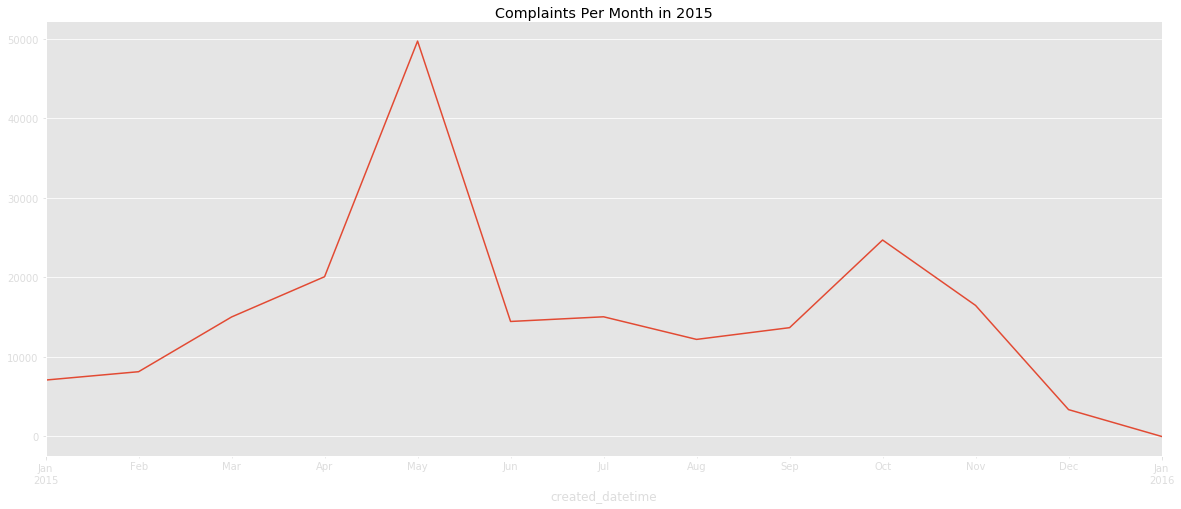

In [47]:
df['Complaint Type'].resample('M').count().plot(figsize=(20,8),title='Complaints Per Month in 2015') #Using the resampler and tada!

There seems to be a peak of complaints in May and October - at the beginning of summer and winter. Coincidence?!

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

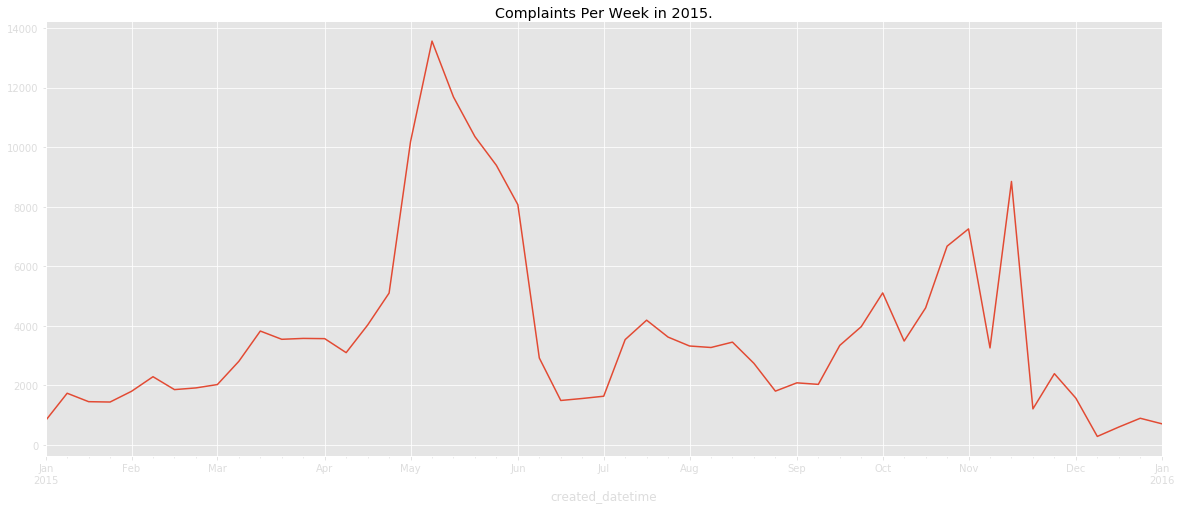

In [48]:
df['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='Complaints Per Week in 2015.')

A little more nuanced than the earlier month graph. 

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [80]:
noise_df = df[df['Complaint Type'].str.contains("Noise")]

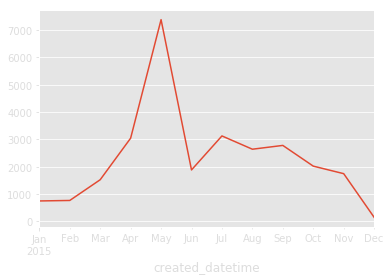

In [85]:
noise_df['created_datetime'].resample('M').count().plot()

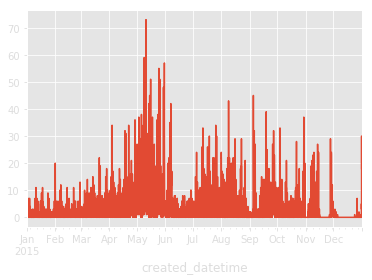

In [87]:
noise_df['created_datetime'].resample('H').count().plot()

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

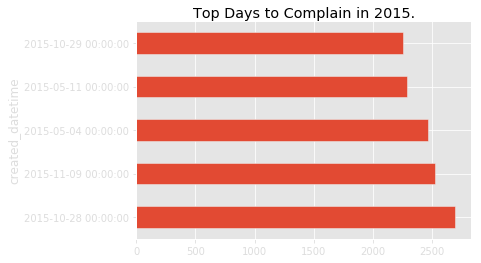

In [49]:
list = df['Complaint Type'].resample('D').count()
list.sort_values(ascending=False).head().plot(kind='barh',title='Top Days to Complain in 2015.')

**What hour of the day are the most complaints?** Graph a day of complaints.

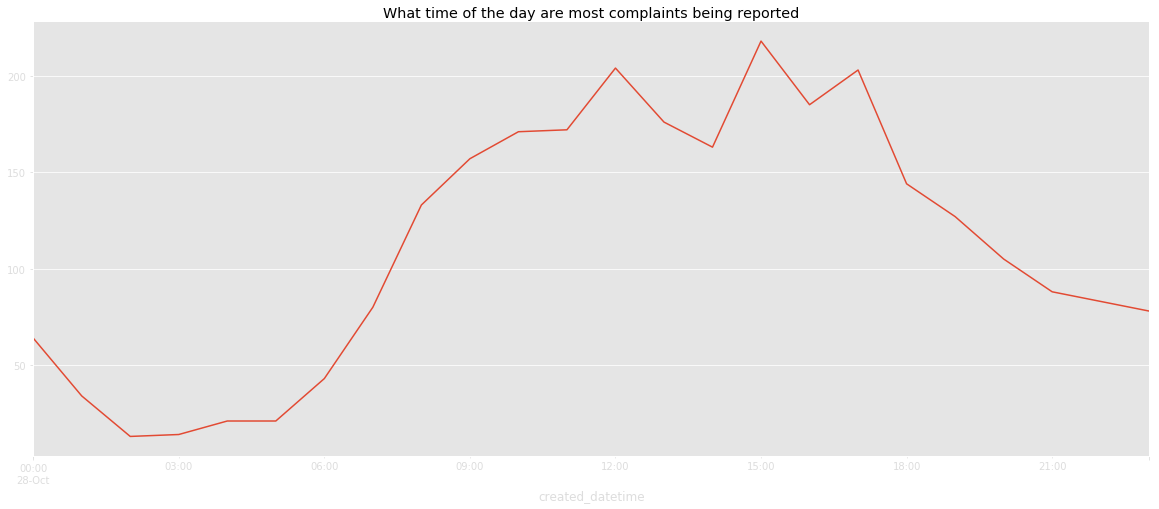

In [51]:
df['2015-10-28']['Complaint Type'].resample('H').count().plot(figsize=(20,8),title='What time of the day are most complaints being reported')

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [52]:
df['2015-10-28 16']['Complaint Type'].value_counts().head(5) #Something seems wrong with 4 o clock that day. 

HEAT/HOT WATER          29
UNSANITARY CONDITION    18
PAINT/PLASTER           17
Illegal Parking         17
WATER LEAK              10
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

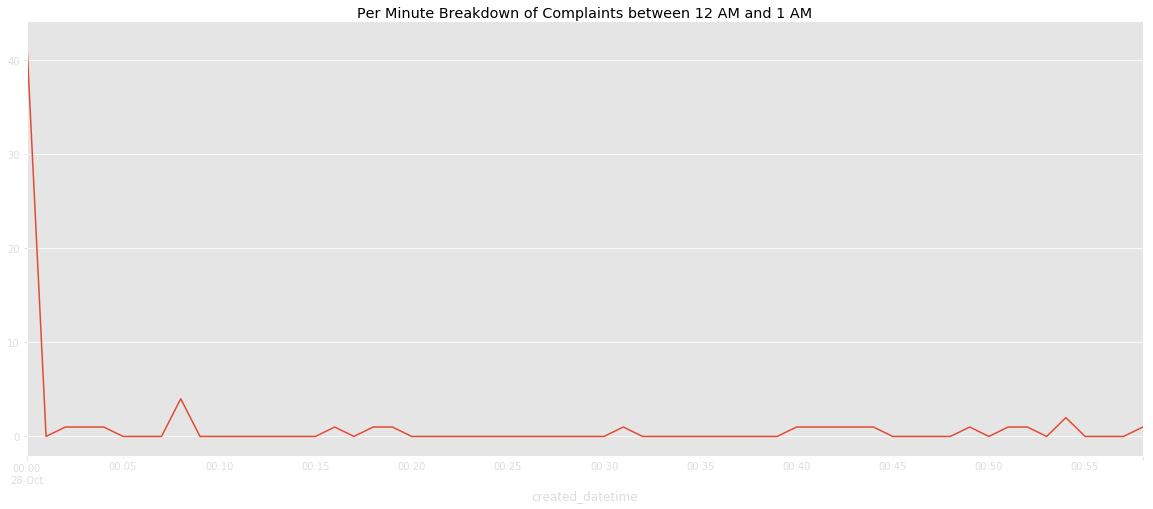

In [53]:
df['2015-10-28 00']['Complaint Type'].resample('T').count().plot(figsize=(20,8),title='Per Minute Breakdown of Complaints between 12 AM and 1 AM')

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [20]:
df['Agency Name'].value_counts().head(5) #Top 5 Agencies that handle complaints for 311. 

New York City Police Department                       80000
Department of Housing Preservation and Development    39363
Department of Transportation                          22308
Department of Parks and Recreation                    15128
Department of Health and Mental Hygiene                8216
Name: Agency Name, dtype: int64

In [21]:
def parse_date_into_time(str_date): #So for us to be able to handle the next questions. I create a function that converts 
                                    #time into a HHMM format so that the graphs below can be smoother. 
    
    h=str(dateutil.parser.parse(str_date).hour)
    m=str(dateutil.parser.parse(str_date).minute)
    t=h+":"+m
    return dateutil.parser.parse(t).time()

In [22]:
parse_date_into_time('07/06/2015 10:58:27 AM') #Seems to be working. 

datetime.time(10, 58)

In [23]:
df['Upload Time']=df['Created Date'].apply(parse_date_into_time) #create a new column called Upload Time. 

In [24]:
df.head(5) #Working. 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime,Upload Time
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27,10:58:00
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29,13:26:00
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09,03:55:00
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32,02:18:00
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27,00:03:00


In [25]:
nypddf=df[df['Agency Name']=='New York City Police Department']

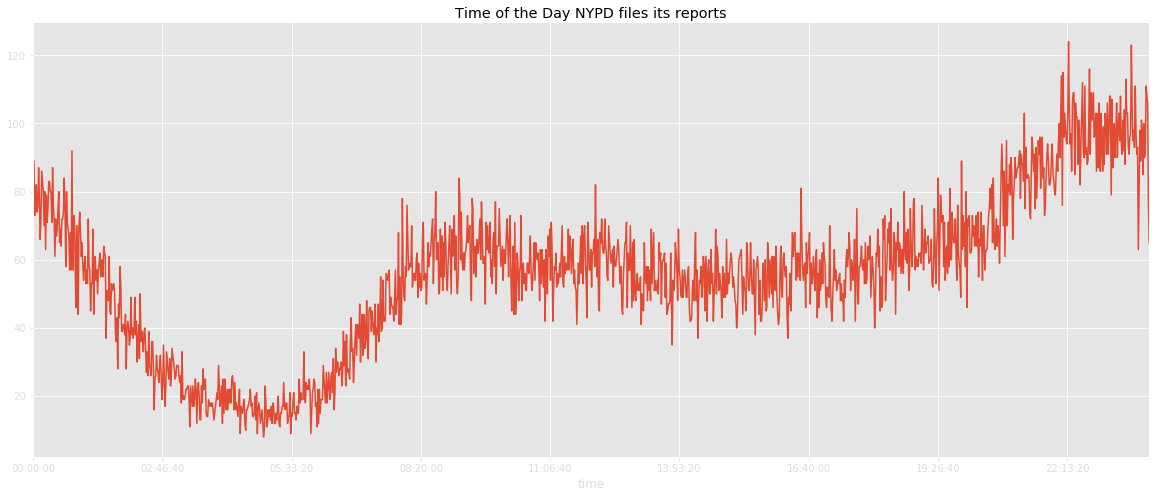

In [54]:
nypddf['Upload Time'].value_counts().plot(figsize=(20,8),title='Time of the Day NYPD files its reports')

In [27]:
dphpdf=df[df['Agency Name']=='Department of Housing Preservation and Development']

In [28]:
dphpdf['Upload Time'].value_counts().head(10) #ALL UPLOADED AT MIDNIGHT, by some unpaid intern. 

00:00:00    14473
13:34:00       57
12:20:00       56
10:10:00       56
13:20:00       55
13:07:00       54
15:38:00       53
11:09:00       52
12:05:00       52
12:09:00       51
Name: Upload Time, dtype: int64

In [29]:
dotdf=df[df['Agency Name']=='Department of Transportation']

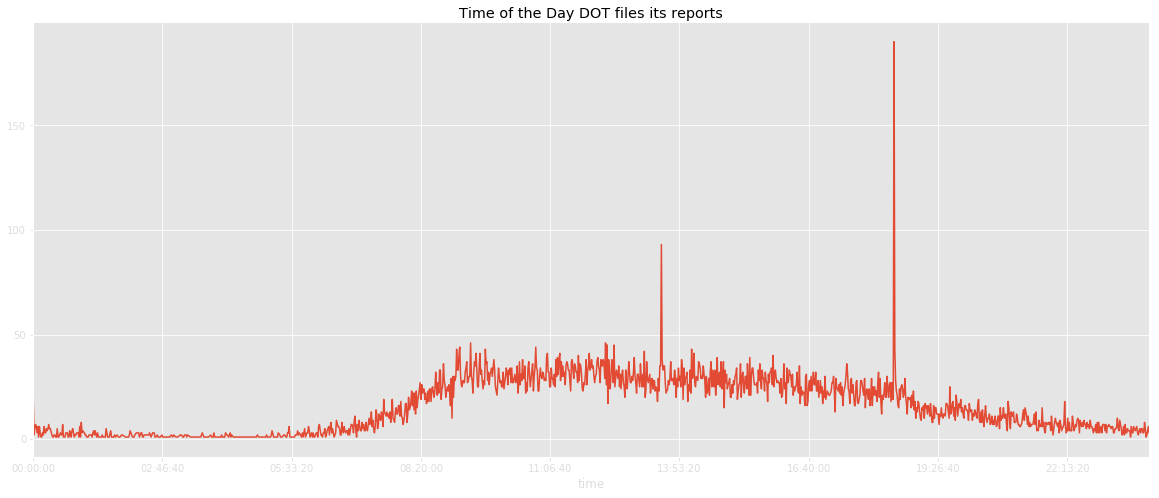

In [55]:
dotdf['Upload Time'].value_counts().plot(figsize=(20,8),title='Time of the Day DOT files its reports')

It looks like they file reports just before lunch time and before they leave office?! 

In [31]:
doprdf=df[df['Agency Name']=='Department of Parks and Recreation']

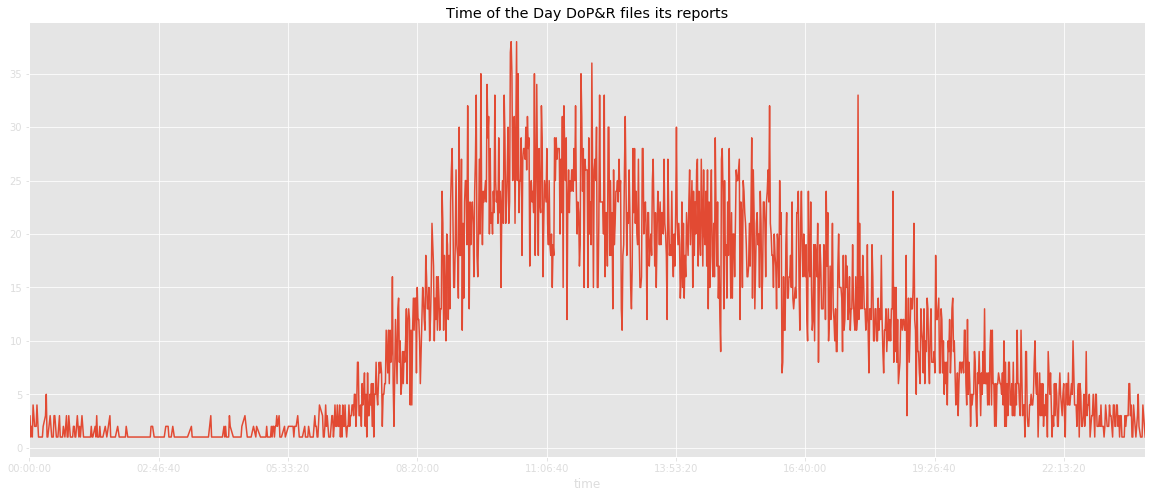

In [56]:
doprdf['Upload Time'].value_counts().plot(figsize=(20,8),title='Time of the Day DoP&R files its reports')

They seem to do it throughout the day. 

In [33]:
dohmhdf=df[df['Agency Name']=='Department of Health and Mental Hygiene']

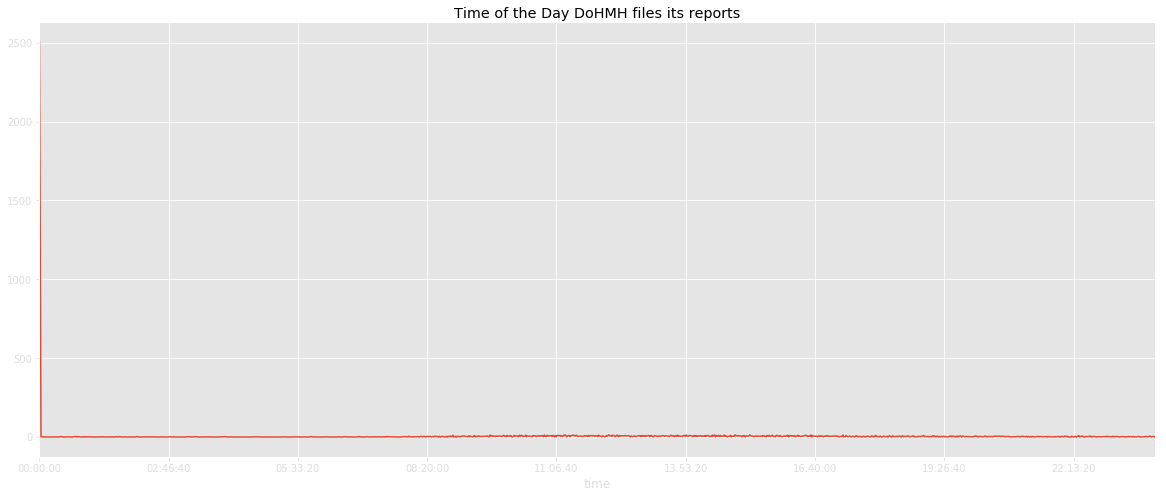

In [57]:
dohmhdf['Upload Time'].value_counts().plot(figsize=(20,8),title='Time of the Day DoHMH files its reports')

Only at Midnight, they upload their data. 

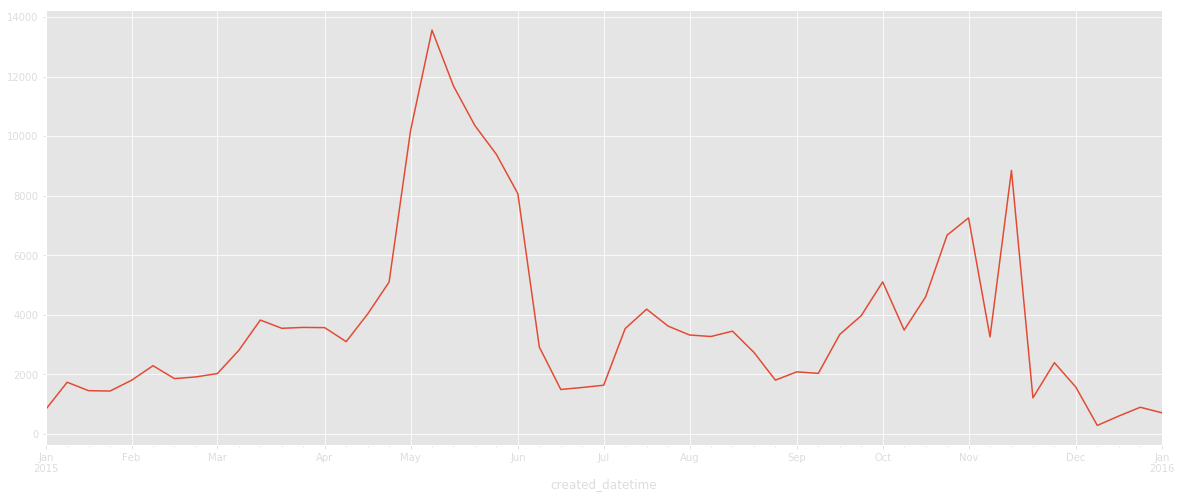

In [35]:
df['Complaint Type'].resample('W').count().plot(figsize=(20,8))

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

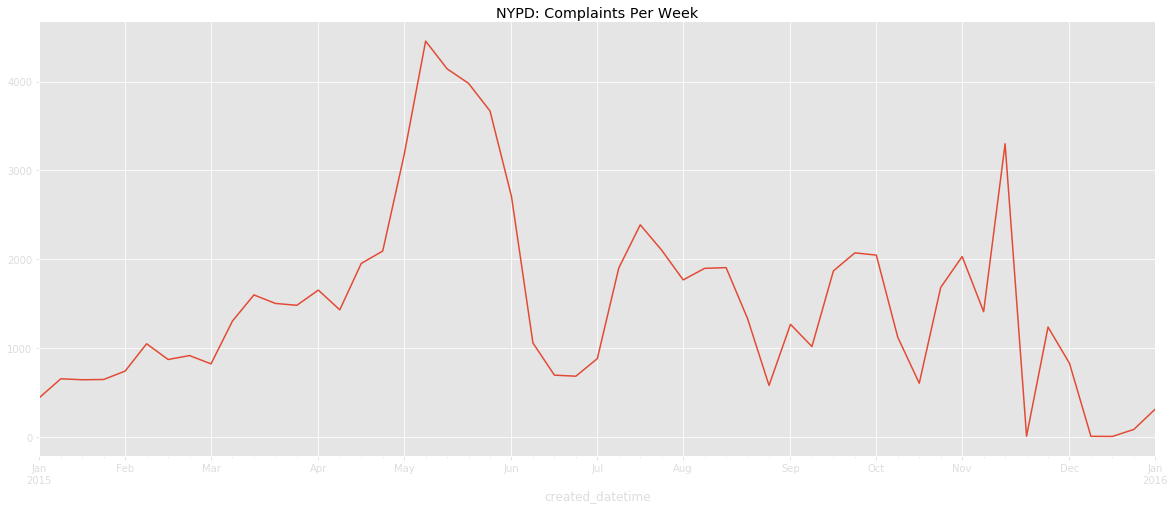

In [58]:
nypddf['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='NYPD: Complaints Per Week')

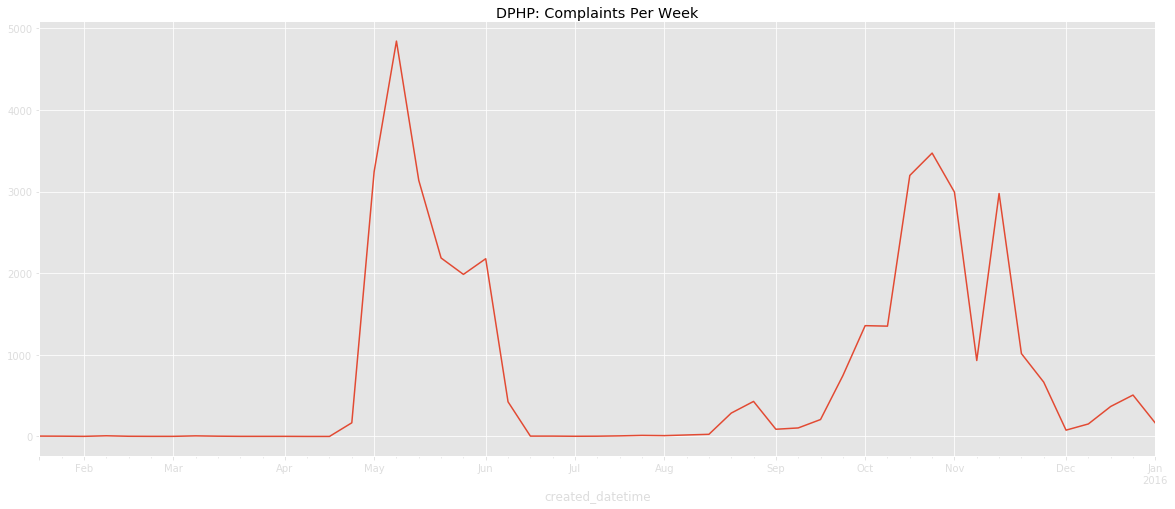

In [59]:
dphpdf['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='DPHP: Complaints Per Week')

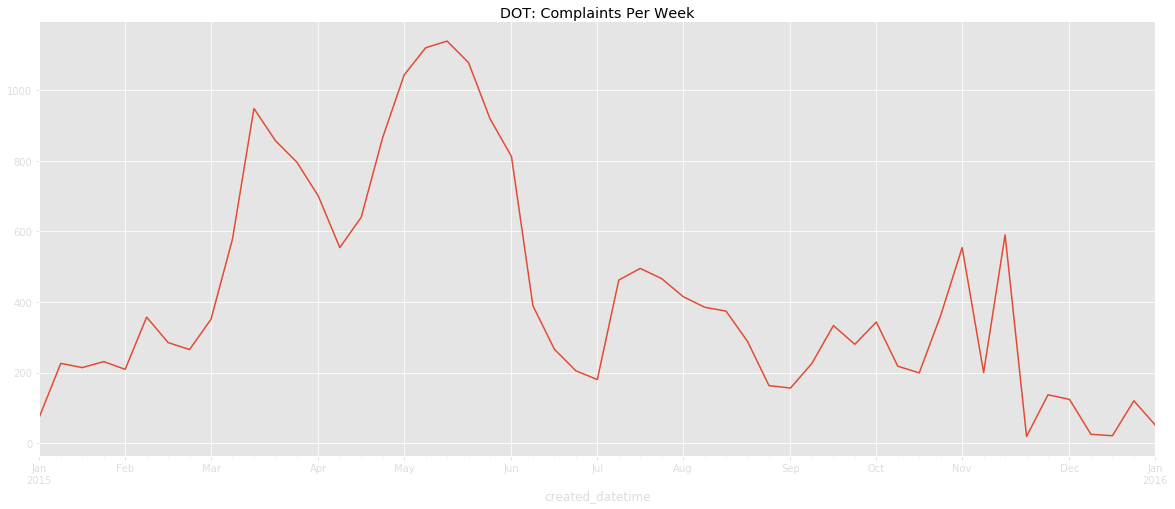

In [60]:
dotdf['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='DOT: Complaints Per Week')

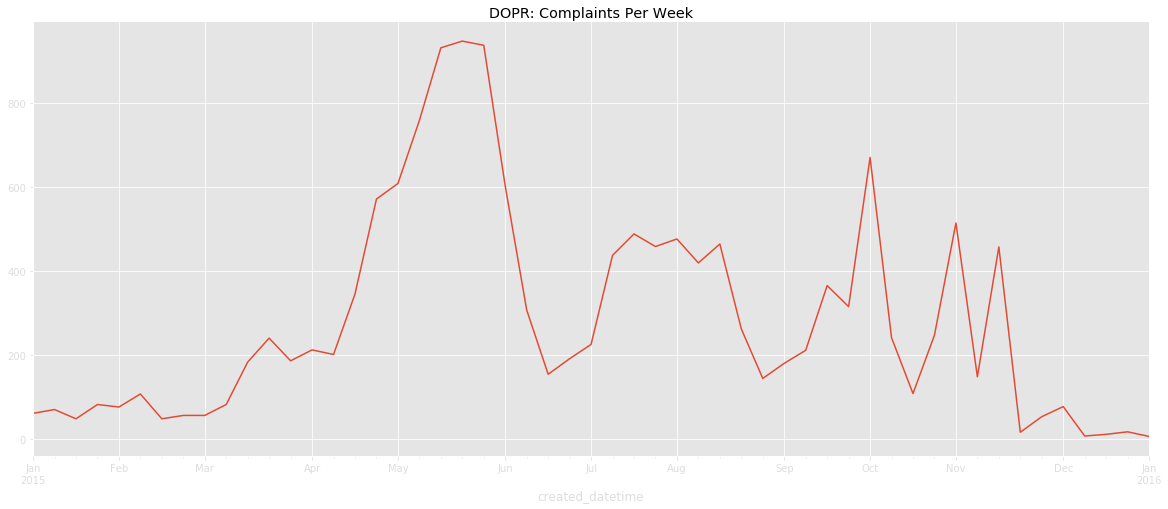

In [61]:
doprdf['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='DOPR: Complaints Per Week')

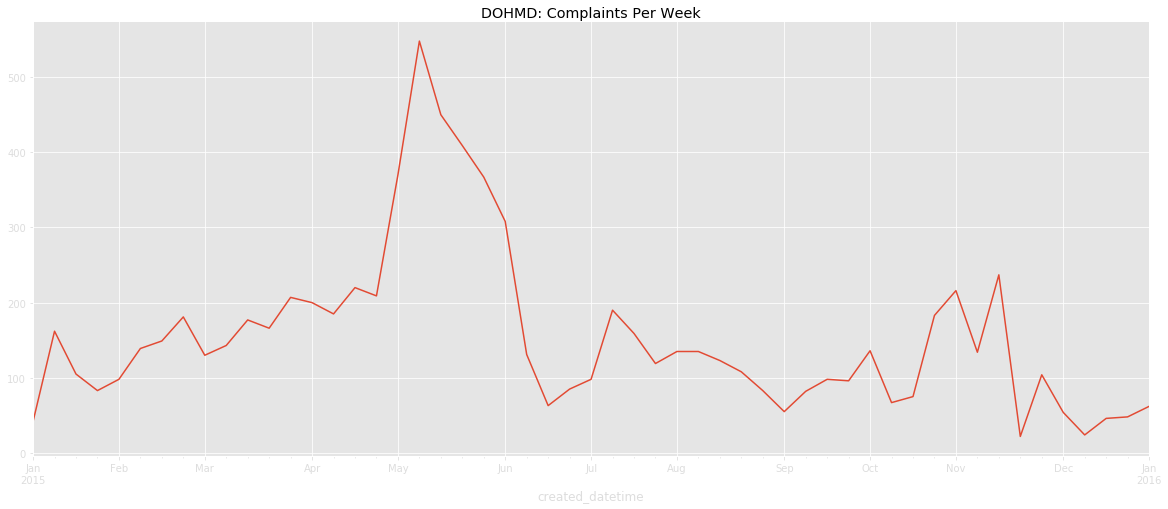

In [62]:
dohmhdf['Complaint Type'].resample('W').count().plot(figsize=(20,8),title='DOHMD: Complaints Per Week')

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [41]:
nypddf['2015-07']['Complaint Type'].value_counts().head() #Most Popular Complaints in July

Illegal Parking            1988
Blocked Driveway           1889
Noise - Street/Sidewalk    1698
Noise - Commercial          659
Derelict Vehicle            535
Name: Complaint Type, dtype: int64

In [42]:
nypddf['2015-08']['Complaint Type'].value_counts().head()#Most Popular Complaints in August

Noise - Street/Sidewalk    1467
Illegal Parking            1456
Blocked Driveway           1369
Noise - Commercial          542
Noise - Vehicle             409
Name: Complaint Type, dtype: int64

In [43]:
nypddf['2015-05']['Complaint Type'].value_counts().head() #Most Popular Complaints in May

Blocked Driveway           4114
Illegal Parking            3975
Noise - Street/Sidewalk    3385
Noise - Commercial         2263
Noise - Vehicle            1232
Name: Complaint Type, dtype: int64

In [44]:
dphpdf['2015-06':'2015-08']['Complaint Type'].value_counts().head() #Most Popular Complaints in the Summer

HEAT/HOT WATER            615
UNSANITARY CONDITION      509
HPD Literature Request    462
PAINT/PLASTER             441
PLUMBING                  308
Name: Complaint Type, dtype: int64

In [45]:
dphpdf['2015-11':'2016-01']['Complaint Type'].value_counts().head() #Most Popular Complaints in the Winter.

HEAT/HOT WATER          3189
UNSANITARY CONDITION     713
PAINT/PLASTER            598
PLUMBING                 532
DOOR/WINDOW              397
Name: Complaint Type, dtype: int64